In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

# link for the dataset
# https://drive.google.com/file/d/1qlm4OnaAM3bdgti9xyUqK3eSFokjYdA-/view

In [29]:
ipl = pd.read_csv('/content/ipl_data.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [30]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [31]:
X = df.drop(['total'], axis =1)
y = df['total']


In [32]:


from sklearn.preprocessing import LabelEncoder


venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()


X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [33]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
# neural network model defining
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])


huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)


In [10]:

model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
560/560 [==============================] - 7s 9ms/step - loss: nan - val_loss: nan
Epoch 2/50
560/560 [==============================] - 3s 6ms/step - loss: nan - val_loss: nan
Epoch 3/50
560/560 [==============================] - 3s 5ms/step - loss: nan - val_loss: nan
Epoch 4/50
560/560 [==============================] - 3s 5ms/step - loss: nan - val_loss: nan
Epoch 5/50
560/560 [==============================] - 4s 7ms/step - loss: nan - val_loss: nan
Epoch 6/50
560/560 [==============================] - 3s 5ms/step - loss: nan - val_loss: nan
Epoch 7/50
560/560 [==============================] - 3s 5ms/step - loss: nan - val_loss: nan
Epoch 8/50
560/560 [==============================] - 3s 5ms/step - loss: nan - val_loss: nan
Epoch 9/50
560/560 [==============================] - 4s 7ms/step - loss: nan - val_loss: nan
Epoch 10/50
560/560 [==============================] - 3s 6ms/step - loss: nan - val_loss: nan
Epoch 11/50
560/560 [==============================] - 3s 5

In [21]:

print("Number of NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())

Number of NaNs in X_test_scaled: 0


In [36]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer=optimizer, loss=huber_loss)


model.fit(X_train_scaled, y_train, epochs=50, batch_size=64,
          validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])


predictions = model.predict(X_test_scaled)


print("Number of NaNs in predictions:", np.isnan(predictions).sum())


if np.isnan(predictions).sum() == 0:
    from sklearn.metrics import mean_absolute_error
    print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
else:
    print("Predictions still contain NaNs. Further investigation is needed.")

Epoch 1/50
832/832 [==============================] - 7s 8ms/step - loss: 32.9541 - val_loss: 22.6414
Epoch 2/50
832/832 [==============================] - 6s 7ms/step - loss: 22.3829 - val_loss: 22.0250
Epoch 3/50
832/832 [==============================] - 4s 5ms/step - loss: 22.3411 - val_loss: 21.9807
Epoch 4/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2429 - val_loss: 22.0582
Epoch 5/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2261 - val_loss: 21.8609
Epoch 6/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1640 - val_loss: 21.9022
Epoch 7/50
832/832 [==============================] - 6s 7ms/step - loss: 22.1196 - val_loss: 21.8181
Epoch 8/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1318 - val_loss: 22.2037
Epoch 9/50
832/832 [==============================] - 4s 5ms/step - loss: 22.0995 - val_loss: 21.9056
Epoch 10/50
832/832 [==============================] - 6s 7ms/step - loss: 22.0659

<Axes: >

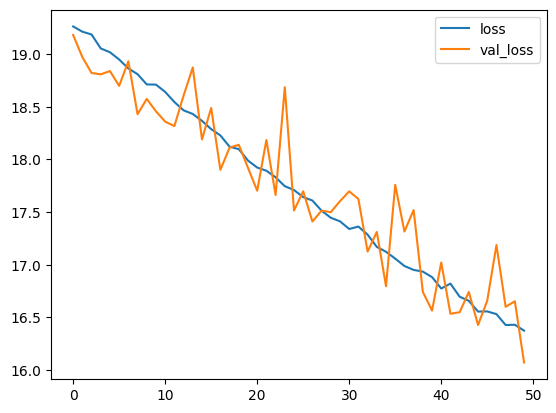

In [37]:

# history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64,
                    # validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])


model_losses = pd.DataFrame(history.history)


model_losses.plot()

In [38]:

predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 [==============================] - 1s 2ms/step


19.71998283454813

In [39]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()



        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)

        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [40]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()